##### RMS Titanic, during her maiden voyage on April 15, 1912, sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. 
##### The tragedy is considered one of the most infamous shipwrecks in history and led to better safety guidelines for ships.
##### In this challenge, we are asked to predict whether a passenger on the titanic would have been survived or not.
###### The data has been split into two groups:
###### (a). training set (train.csv) 
###### (b). test set (test.csv). 
###### The training set should be used to build your machine learning models. 
###### The test set should be used to see how well your model performs on unseen data. 
###### For each passenger in the test set, we use the model we train to predict whether or not they survived the sinking of the Titanic.
### Data Dictionary
###### Variable Definition: Key
###### survival Survival: 0 = No, 1 = Yes
###### pclass Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
###### sex: Male or Female
###### Age: Age in years 
###### sibsp: # of siblings / spouses aboard the Titanic 
###### parch: # of parents / children aboard the Titanic 
###### ticket: Ticket number 
###### fare: Passenger fare 
###### cabin: Cabin number 
###### embarked Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton
###### Variable Notes pclass: A proxy for socio-economic status: 1st = Upper, 2nd = Middle, 3rd = Lower
###### age: Age is fractional if less than 1. 
###### sibsp: The dataset defines family relations in this way...
###### Sibling = brother, sister, stepbrother, stepsister
###### Spouse = husband, wife (mistresses and fiancés were ignored)
###### parch: The dataset defines family relations in this way...
###### Parent = mother, father
###### Child = daughter, son, stepdaughter, stepson
###### Some children travelled only with a nanny, therefore parch=0 for them

In [44]:
#Loading requisite libraries
import pycaret
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

##### Loading dataset

In [45]:
# Read CSV train data file into DataFrame
train_df=pd.read_csv('C:\\Users\\dicks\\Documents\\titanic\\train.csv')
# Read CSV test data file into DataFrame
test_df=pd.read_csv('C:\\Users\\dicks\\Documents\\titanic\\test.csv')
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 891.


In [4]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

The number of samples into the test data is 418.


##### Exploratory Analysis

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Checking for the null values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', 'Percentage %'])
missing_data.head(5)

,Total,Percentage %
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


##### 77% of the values for 'Cabin' Feature are missing, which means that imputing variables like the mode is not the best option and it's not advisable to use this variable in our prediction. Therefore, we'll ignore this variable in our model.
##### 20% of the values for passenger age are missing. 
##### Let's see what the distribution of the 'Age' variable looks like in general.

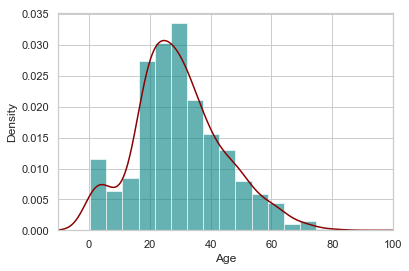

In [9]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='darkred')
ax.set(xlabel='Age')
plt.xlim(-10,100)
plt.show()

##### Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. 
##### To deal with this, we'll use the median to impute the missing values. 

In [10]:
# median age
print('The median Age is %.2f' %(train_df["Age"].median(skipna=True)))

The median Age is 28.00


##### There are only 2 (0.22%) missing values for "Embarked".
##### So we can just impute with the port where most people boarded.

In [11]:
print('The most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


##### Data Imputation

In [46]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)# Impute missing values with the median age
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)#Impute missing values with the port where most people boarded
train_data.drop('Cabin', axis=1, inplace=True)# Dropping the "cabins" feature

In [13]:
# check missing values in adjusted train data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [47]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [48]:
#Let's apply the same changes to the test dataset
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"]# check missing values in adjusted train data
train_data.isnull().sum().fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [49]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


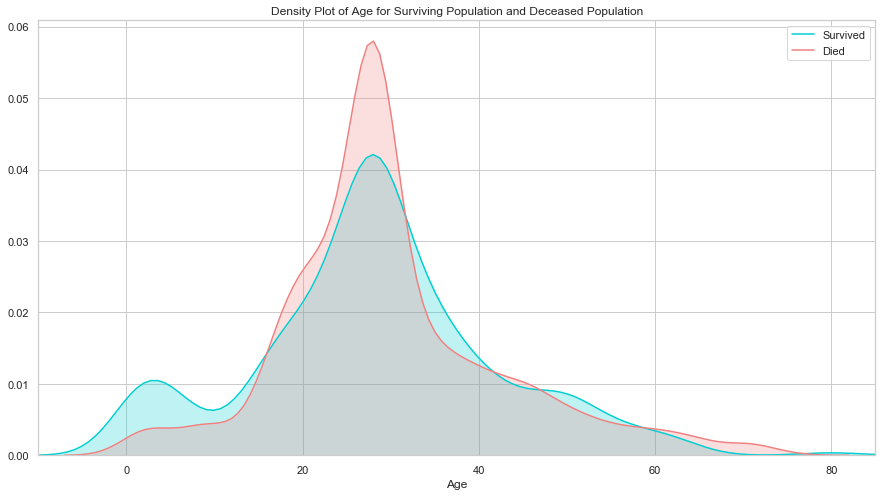

In [22]:
##### Exploration of the survival vs age 
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_data["Age"][train_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_data["Age"][train_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

##### The age distribution for survivors and deceased is very similar. 
##### One notable difference is that, of the survivors, a larger proportion were children. 

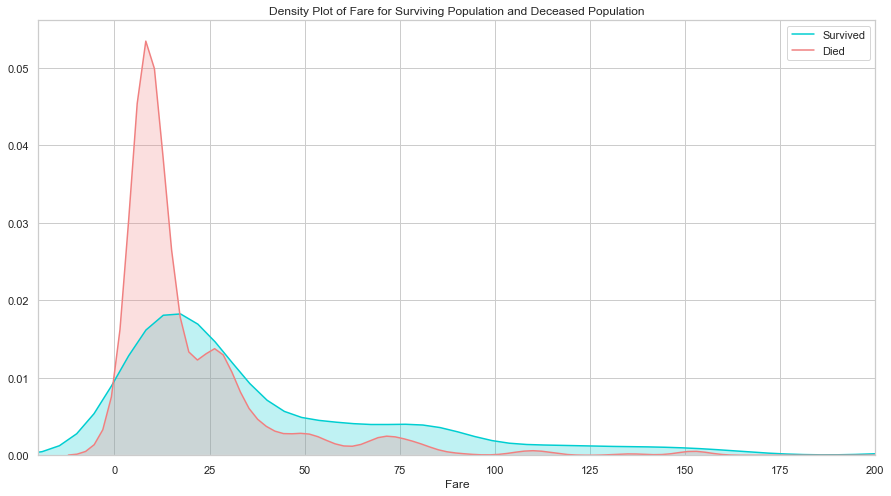

In [37]:
#####Exploration of survival vs Fare feature
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_data["Fare"][train_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_data["Fare"][train_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

##### As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. 
##### Passengers who paid lower fare appear to have been less likely to survive. 
##### This is probably strongly correlated with Passenger Class, which we'll look at next.

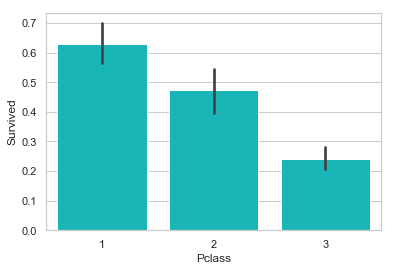

In [24]:
sns.barplot('Pclass', 'Survived', data=train_data, color="darkturquoise")
plt.show()

##### Being a first class passenger was safest

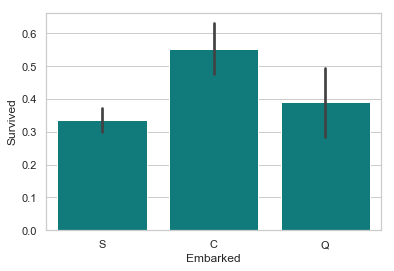

In [25]:
##Exploration of survival vs Port of Embarkation
sns.barplot('Embarked', 'Survived', data=train_df, color="darkcyan")
plt.show()

##### Passengers who boarded in Cherbourg, France, appear to have the highest survival rate. 
##### Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown. 
##### This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck).

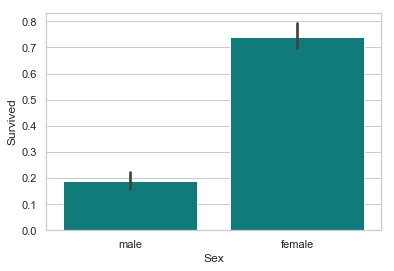

In [26]:
#### Exploration of survival vs gender of passenger
sns.barplot('Sex', 'Survived', data=train_data, color="darkcyan")
plt.show()

##### Being female greatly increased your chances of survival.

### Feature Engineering

In [50]:
# Combine test and train as single dataframe to apply some functions
all_data=[train_data,test_data]
# Create new feature FamilySize as a combination of SibSp and Parch, Age Bin and Fare Bins to bin the ages and fare into respective categories
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])
    
                                                                                      

In [51]:
import re
"""Define function to extract titles from passenger names"""
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Other"
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [52]:
### for our reference making a copy of both DataSet start working for copy of dataset
traindf=train_data
testdf=test_data

In [53]:
all_dat=[traindf,testdf]

In [54]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Age_bin,Fare_bin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Adult,Low_fare,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Adult,high_fare,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Adult,median_fare,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Adult,high_fare,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Adult,median_fare,Mr


In [55]:
###Lastly,let's drop the unnnecessary features
for dataset in all_dat:
    drop_column = ['Name','Ticket','PassengerId']
    dataset.drop(drop_column, axis=1, inplace = True)

In [56]:
#Final clean train dataset
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Age_bin,Fare_bin,Title
0,0,3,male,22.0,1,0,7.2500,S,2,Adult,Low_fare,Mr
1,1,1,female,38.0,1,0,71.2833,C,2,Adult,high_fare,Mrs
2,1,3,female,26.0,0,0,7.9250,S,1,Adult,median_fare,Miss
3,1,1,female,35.0,1,0,53.1000,S,2,Adult,high_fare,Mrs
4,0,3,male,35.0,0,0,8.0500,S,1,Adult,median_fare,Mr


In [57]:
#Final clean test dataset
testdf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Age_bin,Fare_bin,Title
0,3,male,34.5,0,0,7.8292,Q,1,Adult,Low_fare,Mr
1,3,female,47.0,1,0,7.0000,S,2,Elder,Low_fare,Mrs
2,2,male,62.0,0,0,9.6875,Q,1,Elder,median_fare,Mr
3,3,male,27.0,0,0,8.6625,S,1,Adult,median_fare,Mr
4,3,female,22.0,1,1,12.2875,S,3,Adult,median_fare,Mrs


##### Convert Categorical Features into dummy variables

In [60]:
train_df = pd.get_dummies(traindf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Embarked","Fare_type"])

In [61]:
test_df = pd.get_dummies(testdf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Embarked","Fare_type"])

In [62]:
train_df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Age_type_Children,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Embarked_C,Embarked_Q,Embarked_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,0,3,22.0,1,0,7.2500,2,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
1,1,1,38.0,1,0,71.2833,2,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1


In [63]:
test_df.head(2)

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Age_type_Children,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Embarked_C,Embarked_Q,Embarked_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,3,34.5,0,0,7.8292,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
1,3,47.0,1,0,7.0000,2,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0


### Let's utilize the pycaret library which auto-tunes our model for the best performance


In [67]:
from pycaret.classification import *
clf1 = setup(data = train_df, target = 'Survived')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1568
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 25)"
4,Missing Values,False
5,Numeric Features,20
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [68]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.833300,0.000000,0.757400,0.801300,0.777100,0.644300
1,Linear Discriminant Analysis,0.833300,0.873800,0.753300,0.803900,0.775800,0.643600
2,Logistic Regression,0.826900,0.869800,0.753400,0.789000,0.769800,0.631400
3,Gradient Boosting Classifier,0.825200,0.880500,0.724100,0.804100,0.760400,0.623500
4,Extreme Gradient Boosting,0.818800,0.877200,0.703100,0.805500,0.748900,0.608300
5,Light Gradient Boosting Machine,0.818800,0.879200,0.732600,0.782300,0.756300,0.612400
6,CatBoost Classifier,0.810900,0.882700,0.728400,0.769200,0.746600,0.596100
7,Random Forest Classifier,0.805900,0.846600,0.707600,0.772200,0.735200,0.583000
8,Ada Boost Classifier,0.798100,0.858200,0.728400,0.743500,0.734800,0.571900
9,Extra Trees Classifier,0.778900,0.817900,0.715400,0.716500,0.713600,0.534000


##### As we observe, the Support Vector Machine Classifier achieves an accuracy of 74.6% on our test data set with a linear kernel parameter tuning
##### Let's tune our SVM model by the Accuracy metric. The algorithm performs a 10-fold cross validation and returns the mean of the accuracy results

In [70]:
tuned_svm=tune_model('svm', optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7460,0.0,0.7500,0.6429,0.6923,0.4783
1,0.8095,0.0,0.7083,0.7727,0.7391,0.5896
2,0.7619,0.0,0.6667,0.6957,0.6809,0.4911
3,0.8065,0.0,0.7083,0.7727,0.7391,0.5857
4,0.8548,0.0,0.7917,0.8261,0.8085,0.6917
5,0.8065,0.0,0.7083,0.7727,0.7391,0.5857
6,0.7903,0.0,0.6667,0.7619,0.7111,0.5477
7,0.8226,0.0,0.7917,0.7600,0.7755,0.6289
8,0.8548,0.0,0.8750,0.7778,0.8235,0.7010
9,0.8387,0.0,0.7391,0.8095,0.7727,0.6481


##### We observe that our accuarcy has improved by 6 % 

In [71]:
evaluate_model(tuned_svm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

##### Finally let's predict the model on our test data
##### finalize_model function fits the model on the entire dataset

In [72]:
final_svm= finalize_model(tuned_svm)

In [73]:
print(final_svm)

SGDClassifier(alpha=0.0005, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.3, fit_intercept=False,
              l1_ratio=0.03, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1568, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [74]:
predictions= predict_model(final_svm, data=test_df)

In [76]:
#The label columns denotes our prediction of whether the passenger survived (1) or not (0)
predictions.head(10)

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,...,Age_type_Adult,Age_type_Elder,Embarked_C,Embarked_Q,Embarked_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare,Label
0,3,34.5,0,0,7.8292,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
1,3,47.0,1,0,7.0000,2,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
2,2,62.0,0,0,9.6875,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
3,3,27.0,0,0,8.6625,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
4,3,22.0,1,1,12.2875,3,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1
5,3,14.0,0,0,9.2250,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
6,3,30.0,0,0,7.6292,1,1,0,0,1,...,1,0,0,1,0,1,0,0,0,1
7,2,26.0,1,1,29.0000,3,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
8,3,18.0,0,0,7.2292,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
9,3,21.0,2,0,24.1500,3,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
